In [ ]:
#LESSON 6 Mini Assessments

In [ ]:
#(1.,2.,3.)Data file is from https://kaggle.com.com/datasets and is called 'StudentsPerformance.csv' last updated 2018.
#It is about the performance of High school students in the USA. The gender, race/ethnicity, Parental level of Education, 
#lunch, test preparation course, Math score, Reading score,Writing score are recorded for each student. This dataset has
#both Quantitative and Qualitative data. I chose this 
#dataset because I am a student too and I can relate to the experience of being a student and I understand the data 
#collected about the students performance and criteria about the students. So I am knowledgeable about the domain of the 
#research.
#
#(4.)Data Analytics cycle
#1.Analyse the dataset
#2.Clean and Prepare the data for use
#3.Make hypotheses and do Hypothesis testing on the data

In [ ]:
#
#
#(5.)Load Data

In [4]:
import pandas as pd
import numpy as np

In [5]:
df=pd.read_csv('StudentsPerformance.csv', low_memory=False)

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.tail(15)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
985,male,group A,high school,standard,none,57,51,54
986,female,group C,associate's degree,standard,none,40,59,51
987,male,group E,some high school,standard,completed,81,75,76
988,female,group A,some high school,free/reduced,none,44,45,45
989,female,group D,some college,free/reduced,completed,67,86,83
990,male,group E,high school,free/reduced,completed,86,81,75
991,female,group B,some high school,standard,completed,65,82,78
992,female,group D,associate's degree,free/reduced,none,55,76,76
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
994,male,group A,high school,standard,none,63,63,62


In [ ]:
#(6.,7.)The data looks very neat. No missing data.  All rows have all columns filled with data in neat form. The only thing is 
#that it classifies race/ethnicity by category A etc. and we cannot tell by looking at the data what racce is each 
#student. The data is not pepared in any particular order, that is it is not in score order or any other classification
# order. However it does include the three most important performance measurement for students that is first writing then 
#reading then maths.

In [ ]:
#putting columns names in correct format

In [7]:
df.columns=['gender', 'race', 'parent_education', 'lunch', 'test_prep_course', 'math_score', 'reading_score',
            'writing_score']

In [8]:
df.head()


,gender,race,parent_education,lunch,test_prep_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
df2=df.sort_values(['writing_score', 'reading_score', 'math_score'], ascending=[False, False, False])
df2.head()

,gender,race,parent_education,lunch,test_prep_course,math_score,reading_score,writing_score
458,female,group E,bachelor's degree,standard,none,100,100,100
916,male,group E,bachelor's degree,standard,completed,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100
114,female,group E,bachelor's degree,standard,completed,99,100,100
179,female,group D,some high school,standard,completed,97,100,100


In [ ]:
#

In [ ]:
#(8.)Exploratory Data Analysis

In [10]:
ethnicity_achievers=df2.pivot_table(
    values=['writing_score', 'reading_score', 'math_score'],
    index='race',
    aggfunc='mean')

In [11]:
ethnicity_achievers

,math_score,reading_score,writing_score
race,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


In [ ]:
#from above ethnicity_achievers pivot table we find the mean in scores for each etnicity group. We can see that race group
#E is the best performing race group in the USA overall.

In [ ]:
#

In [ ]:
#2nd pivot table
#from pivot table below we find the relationship between the parent education and the median scores for writing, reading 
#and maths. We use the median because the mean might be skewed by a few high achieving students or some very
#low achievers in each subject; writing, 
#reading and maths in each category of parent education.

In [13]:
parentedu_relation=df2.pivot_table(
    values=['writing_score', 'reading_score', 'math_score'],
    index='parent_education',
    aggfunc='median')
parentedu_relation

,math_score,reading_score,writing_score
parent_education,,,
associate's degree,67.0,72.5,70.5
bachelor's degree,68.0,73.0,74.0
high school,63.0,66.0,64.0
master's degree,73.0,76.0,75.0
some college,67.5,70.5,70.0
some high school,65.0,67.0,66.0


In [ ]:
#the pivot table below is like the one above except that we aggregate using the mean instead of the median. Just to see
#the difference between what the median and mean show. I think the median provides a clearer picture.

In [14]:
parentedu_relation=df2.pivot_table(
    values=['writing_score', 'reading_score', 'math_score'],
    index='parent_education',
    aggfunc='mean')
parentedu_relation

,math_score,reading_score,writing_score
parent_education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


In [ ]:
#

In [ ]:
#groupby gender to find out whether males or females are the better performers

In [36]:
group_gender=df2.groupby('gender')

print(group_gender)


In [ ]:
#we find the mean of the scores

In [37]:
group_gender['writing_score','reading_score','math_score'].mean()

C:\Users\johnj\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,writing_score,reading_score,math_score
gender,,,
female,72.467181,72.608108,63.633205
male,63.311203,65.473029,68.728216


In [ ]:
#we find the median of the scores. The median gives a better picture to distinguish between males and females. It
#seems males perform better at math.

In [38]:
group_gender['writing_score','reading_score','math_score'].median()

C:\Users\johnj\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,writing_score,reading_score,math_score
gender,,,
female,74,73,65
male,64,66,69


In [ ]:
#

In [ ]:
#2nd groupby

In [ ]:
#groupby those who prepared for the exams and those who did not. It is obvious that those who completed prep course did
#better.

In [39]:
group_exam_prep=df2.groupby('test_prep_course')

In [40]:
group_exam_prep['writing_score','reading_score','math_score'].mean()

C:\Users\johnj\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,writing_score,reading_score,math_score
test_prep_course,,,
completed,74.418994,73.893855,69.695531
none,64.504673,66.534268,64.077882


In [41]:
group_exam_prep['writing_score','reading_score','math_score'].median()

C:\Users\johnj\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,writing_score,reading_score,math_score
test_prep_course,,,
completed,76,75,69
none,65,67,64


In [ ]:
#

In [ ]:
#

In [ ]:
#Visualisations

In [58]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns


In [ ]:
#this first plot is a graph showing the distributions of math scores in the students population. Males & Females.

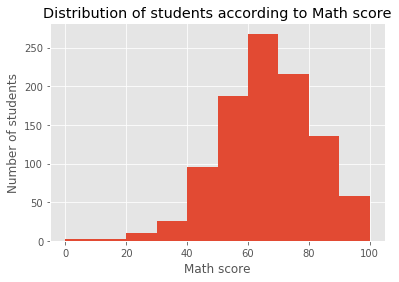

In [48]:
plt.hist(x=df2['math_score'])
plt.title('Distribution of students according to Math score')
plt.xlabel('Math score')
plt.ylabel('Number of students')
plt.show()

In [ ]:
#

In [ ]:
#Below a graph based on pivot table ethnicity achievers above. We plot performance of students in three areas
#according to their ethnicity. We use the ethnicity_achievers pivot table from above.

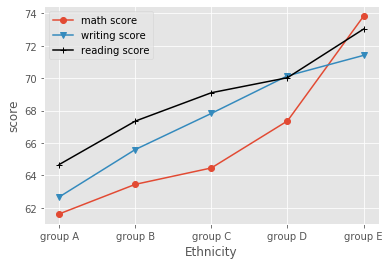

In [56]:
#create the fig and ax objects
fig, ax = plt.subplots()
#add data to the ax object
ax.plot(ethnicity_achievers.index, ethnicity_achievers['math_score'], label='math score',marker='o')
ax.plot(ethnicity_achievers.index, ethnicity_achievers['writing_score'], label='writing score',marker='v')
ax.plot(ethnicity_achievers.index, ethnicity_achievers['reading_score'], label='reading score',marker='+',color='black')
ax.set_xlabel('Ethnicity')
ax.set_ylabel('score')
plt.legend()
plt.show()

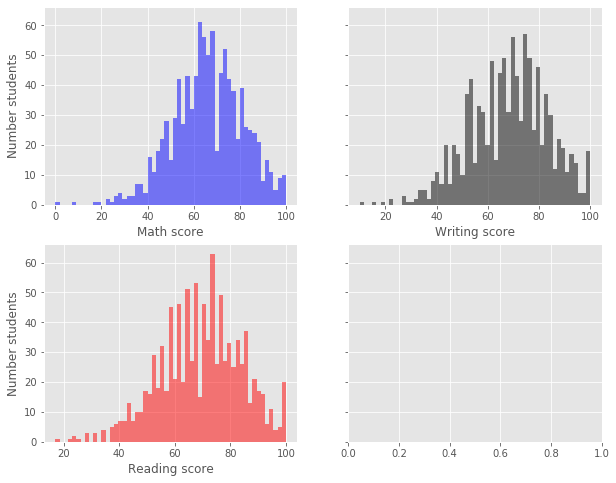

In [60]:
#
#Plot 3 bar graphs one for each subject
fig, ax = plt.subplots(2,2, sharey=True, figsize=(10,8))
#add the subjects data
ax[0,0].hist(df2['math_score'], bins=55,color='blue', alpha=0.5)
ax[0,1].hist(df2['writing_score'], bins=55, color='black', alpha=0.5)
ax[1,0].hist(df2['reading_score'], bins=55, color='red', alpha=0.5)
#
ax[0,0].set_xlabel('Math score')
ax[0,1].set_xlabel('Writing score')
ax[1,0].set_xlabel('Reading score')
ax[0,0].set_ylabel('Number students')
ax[1,0].set_ylabel('Number students')
plt.show()

In [ ]:
#
#

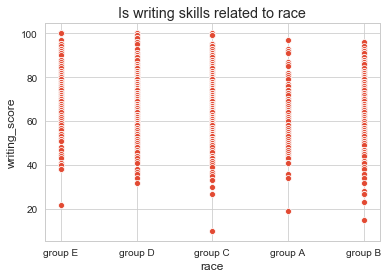

In [61]:
#Seaborn
#A scatter plot of scores of the writing score by ethnicity
sns.set_style('whitegrid')
sns.scatterplot(x='race', y='writing_score',data=df2)
plt.title('Is writing skills related to race')
plt.show()

In [ ]:
#from scatter graph above in general group E and D do better at writing

In [ ]:
#

In [ ]:
#a plot of the same as above showing to give a clearer picture
#matplotlib

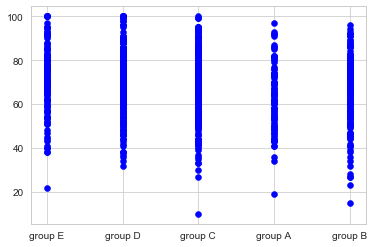

In [65]:
plt.scatter(x=df2['race'], y=df2['writing_score'],marker='o', color='blue');


In [ ]:
#
#

In [ ]:
#matplotlib

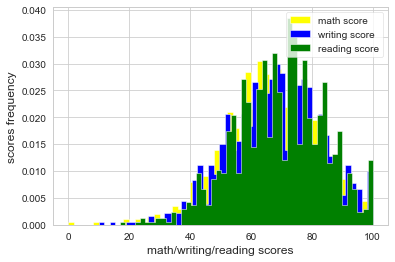

In [73]:
plt.hist(x=df2['math_score'],color='yellow',bins=50,histtype='stepfilled',density=True,label='math score')
plt.hist(x=df2['writing_score'],color='blue',bins=50,histtype='stepfilled',density=True,label='writing score')
plt.hist(x=df2['reading_score'],color='green',bins=50,histtype='stepfilled',density=True,label='reading score')
plt.xlabel('math/writing/reading scores')
plt.ylabel('scores frequency')
plt.legend()
plt.show()

In [ ]:
#
#Bokeh interactive plot

In [12]:
from bokeh.io import output_file, show, output_notebook
from bokeh.plotting import figure
#create figure and add it to a variable
plot=figure(title='math score v/s writing score',x_axis_label='math score',y_axis_label='writing score',
            plot_width=400, tools='pan, box_zoom')
plot.circle(x=df2['math_score'], y=df2['writing_score'])
output_file('circle.html') #will save the output as an html file
show(plot)

In [ ]:
#

In [ ]:
#(9.)I have done all the miniassessment for week 6. 
#
#(10.)Future Work
#5 hypotheses
1.Covid-19 will affect the performance of male & female students as their learning is affected.
2.The economic performance of the USA will affect how each race performs in their exam scores.
3.The USA students performance is lower than other top world industrialised countries.
4.The performance of USA students depend on the quality level of the teachers teaching them.
5.Do the best student performances come from students from private schools?